## 2.1

In [1]:
import os
from PIL import Image
import numpy as np
def load_mnist_data(base_path):
    data = {'train': [], 'val': [], 'test': []}
    labels = {'train': [], 'val': [], 'test': []}
    
    # Loop over each data split
    for split in ['train', 'val', 'test']:
        split_path = os.path.join(base_path, split)
        
        # Loop over each label folder within the split directory
        for label_folder in os.listdir(split_path):
            label_path = os.path.join(split_path, label_folder)
            
            # Check if the path is a directory
            if os.path.isdir(label_path):
                # Determine the label by counting the digits in the folder name
                label_count = len(label_folder) if label_folder.isdigit() else 0
                
                # Load each image in the folder
                for img_name in os.listdir(label_path):
                    img_path = os.path.join(label_path, img_name)
                    
                    # Open image, load data, then close immediately
                    with Image.open(img_path) as img:
                        data[split].append(np.array(img.copy()))  # Use img.copy() to load data into memory
                    labels[split].append(label_count)
                    
    return data, labels
base_path = './../../data/external/double_mnist'
data, labels = load_mnist_data(base_path) #PIL format, label length
# Example to access train data
train_images = data['train']
train_labels = labels['train']
val_images = data['val']
val_labels = labels['val']
test_images = data['test']
test_labels = labels['test']

print(train_images[0].shape)
print(len(train_images))

KeyboardInterrupt: 

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torch

class MultiMNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        """
        Args:
            images (list): List of image file paths.
            labels (list): List of labels indicating the number of digits.
            transform (callable, optional): Optional transform to apply on an image.
        """
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        """Returns the total number of images."""
        return len(self.images)

    def __getitem__(self, idx):
        """Loads an image and its label, applies any specified transformation."""
        img = self.images[idx]  # This is a NumPy array
        label = self.labels[idx]
        
        # Convert NumPy array to PyTorch tensor
        img = torch.tensor(img, dtype=torch.float32) / 255.0  # Normalize to [0, 1]
        img = img.unsqueeze(0)  # Add channel dimension for (1, H, W)

        label = torch.tensor(label, dtype=torch.float32)
        
        if self.transform:
            img = self.transform(img)

        return img, label

# Function to create dataloaders
def create_dataloaders(data, labels, batch_size=32):
    loaders = {}
    for split in ['train', 'val', 'test']:
        dataset = MultiMNISTDataset(data[split], labels[split])
        loaders[split] = DataLoader(dataset, batch_size=batch_size, shuffle=(split == 'train')) #shuffle only for train set
    return loaders


# Example usage
# Assuming `load_mnist_data()` has been implemented to load and organize data as per assignment requirements
base_path = './../../data/external/double_mnist'
data, labels = load_mnist_data(base_path)

# Create dataloaders for each split
dataloaders = create_dataloaders(data, labels, batch_size=32)

# Access train loader
train_loader = dataloaders['train']
val_loader = dataloaders['val']
test_loader = dataloaders['test']

print(train_loader)
print(len(train_loader))

394


In [ ]:
for x,y in train_loader:
    print(x[0].shape)
    print(y)
    break

torch.Size([1, 128, 128])
tensor([3., 1., 2., 2., 3., 3., 2., 2., 1., 1., 3., 3., 3., 2., 3., 3., 1., 3.,
        2., 1., 1., 2., 1., 1., 2., 2., 1., 3., 3., 3., 1., 2.])


In [ ]:
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print(cwd)



c:\Users\Pavan\Desktop\smai-m24-assignments-codepk37\smai-m24-assignments-codepk37\assignments\4


## 2.2

In [ ]:
#Regression 
import os
os.chdir('C:/Users/Pavan/Desktop/smai-m24-assignments-codepk37/smai-m24-assignments-codepk37')

from models.cnn.cnn import *

task = 'regression'#'classification'
num_classes = 10
model = CNN(task=task, num_classes=num_classes)

# Train the model
a=train_model(model, train_loader,val_loader=val_loader, num_epochs=10, learning_rate=0.001)

print(a)

Check hthiss   regression


c:\Users\Pavan\miniconda3\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Pavan\miniconda3\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([24])) that is different to the input size (torch.Size([24, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10], Training Loss: 0.5830
Epoch [1/10], Validation Loss: 0.4813
Epoch [2/10], Training Loss: 0.5488
Epoch [2/10], Validation Loss: 0.4601
Epoch [3/10], Training Loss: 0.5482
Epoch [3/10], Validation Loss: 0.4566
Epoch [4/10], Training Loss: 0.5441
Epoch [4/10], Validation Loss: 0.4618
Epoch [5/10], Training Loss: 0.5337
Epoch [5/10], Validation Loss: 0.4606
Epoch [6/10], Training Loss: 0.5379
Epoch [6/10], Validation Loss: 0.4700
Epoch [7/10], Training Loss: 0.5285
Epoch [7/10], Validation Loss: 0.4617
Epoch [8/10], Training Loss: 0.5301
Epoch [8/10], Validation Loss: 0.4584
Epoch [9/10], Training Loss: 0.5289
Epoch [9/10], Validation Loss: 0.5060
Epoch [10/10], Training Loss: 0.5260
Epoch [10/10], Validation Loss: 0.4960
([0.5830391475996995, 0.5488111125636221, 0.5482243142908599, 0.5440607450637721, 0.5337303527039925, 0.5378771455306087, 0.5285263129221607, 0.5300923753057034, 0.528875957058771, 0.5259912741668333], [0.481340469039501, 0.460071095047479, 0.456633500749879

In [ ]:
a= predict(model,val_loader)
print(a)

[np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32(1.8629316), np.float32

In [ ]:
#Classification 
import os
os.chdir('C:/Users/Pavan/Desktop/smai-m24-assignments-codepk37/smai-m24-assignments-codepk37')

from models.cnn.cnn import *

task = 'classification'
num_classes = 10
model = CNN(task=task, num_classes=num_classes)

# Train the model
train_model(model, train_loader,val_loader=val_loader, num_epochs=10, learning_rate=0.001)


Check hthiss   classification
Epoch [1/10], Training Loss: 0.1314
Epoch [1/10], Validation Loss: 0.0041
Epoch [2/10], Training Loss: 0.0163
Epoch [2/10], Validation Loss: 0.0008
Epoch [3/10], Training Loss: 0.0084
Epoch [3/10], Validation Loss: 0.0011
Epoch [4/10], Training Loss: 0.0188
Epoch [4/10], Validation Loss: 0.0015
Epoch [5/10], Training Loss: 0.0039
Epoch [5/10], Validation Loss: 0.0002
Epoch [6/10], Training Loss: 0.0037
Epoch [6/10], Validation Loss: 0.0008
Epoch [7/10], Training Loss: 0.0106
Epoch [7/10], Validation Loss: 0.0088
Epoch [8/10], Training Loss: 0.0393
Epoch [8/10], Validation Loss: 0.0018
Epoch [9/10], Training Loss: 0.0048
Epoch [9/10], Validation Loss: 0.0021
Epoch [10/10], Training Loss: 0.0019
Epoch [10/10], Validation Loss: 0.0002


([0.13138795006796564,
  0.01632105447337436,
  0.008398996428962299,
  0.01884238707395987,
  0.003924566198907653,
  0.0037455325071865356,
  0.010572241020703125,
  0.03926144774250301,
  0.004830699343332137,
  0.001850853937611701],
 [0.0041094092087480575,
  0.000833779622647859,
  0.001062058862034344,
  0.001521083780071936,
  0.00015636519723341864,
  0.000779090611649543,
  0.008820797330484026,
  0.0018150909628573781,
  0.0020790169426641307,
  0.00020552972933033352])

In [ ]:

predictions = predict(model,test_loader)

In [ ]:
print(predictions)

[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)

In [ ]:
true_labels = []
for _, labels in test_loader:
    true_labels.extend(labels.cpu().numpy().astype(np.int64))

accuracy = np.mean(np.array(true_labels) == np.array(predictions))
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

Accuracy on test set: 99.98%


## 2.3 Hyperparameter Tuning

### 1.

In [ ]:
dropout_rate = [0.2, 0.5]
num_conv_layers = [2, 3, 4]
optimizer = ['adam', 'sgd', 'rmsprop']
learning_rate = [0.001, 0.01]
task = ['regression', 'classification']


### 2.

Check hthiss   regression
Epoch [1/5], Training Loss: 0.5596
Epoch [1/5], Validation Loss: 0.4697
Epoch [2/5], Training Loss: 0.5347
Epoch [2/5], Validation Loss: 0.4781
Epoch [3/5], Training Loss: 0.5351
Epoch [3/5], Validation Loss: 0.4541
Epoch [4/5], Training Loss: 0.5333
Epoch [4/5], Validation Loss: 0.4598
Epoch [5/5], Training Loss: 0.5248
Epoch [5/5], Validation Loss: 0.5010
Check hthiss   regression
Epoch [1/5], Training Loss: 13.7835
Epoch [1/5], Validation Loss: 0.5889
Epoch [2/5], Training Loss: 0.5657
Epoch [2/5], Validation Loss: 0.4538
Epoch [3/5], Training Loss: 0.5412
Epoch [3/5], Validation Loss: 0.5340
Epoch [4/5], Training Loss: 0.7821
Epoch [4/5], Validation Loss: 0.5306
Epoch [5/5], Training Loss: 0.7699
Epoch [5/5], Validation Loss: 0.4498
Check hthiss   regression
Epoch [1/5], Training Loss: 0.5682
Epoch [1/5], Validation Loss: 0.4607
Epoch [2/5], Training Loss: 0.5449
Epoch [2/5], Validation Loss: 0.4614
Epoch [3/5], Training Loss: 0.5272
Epoch [3/5], Validatio

C:\Users\Pavan\AppData\Local\Temp\ipykernel_21724\3108330926.py:84: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


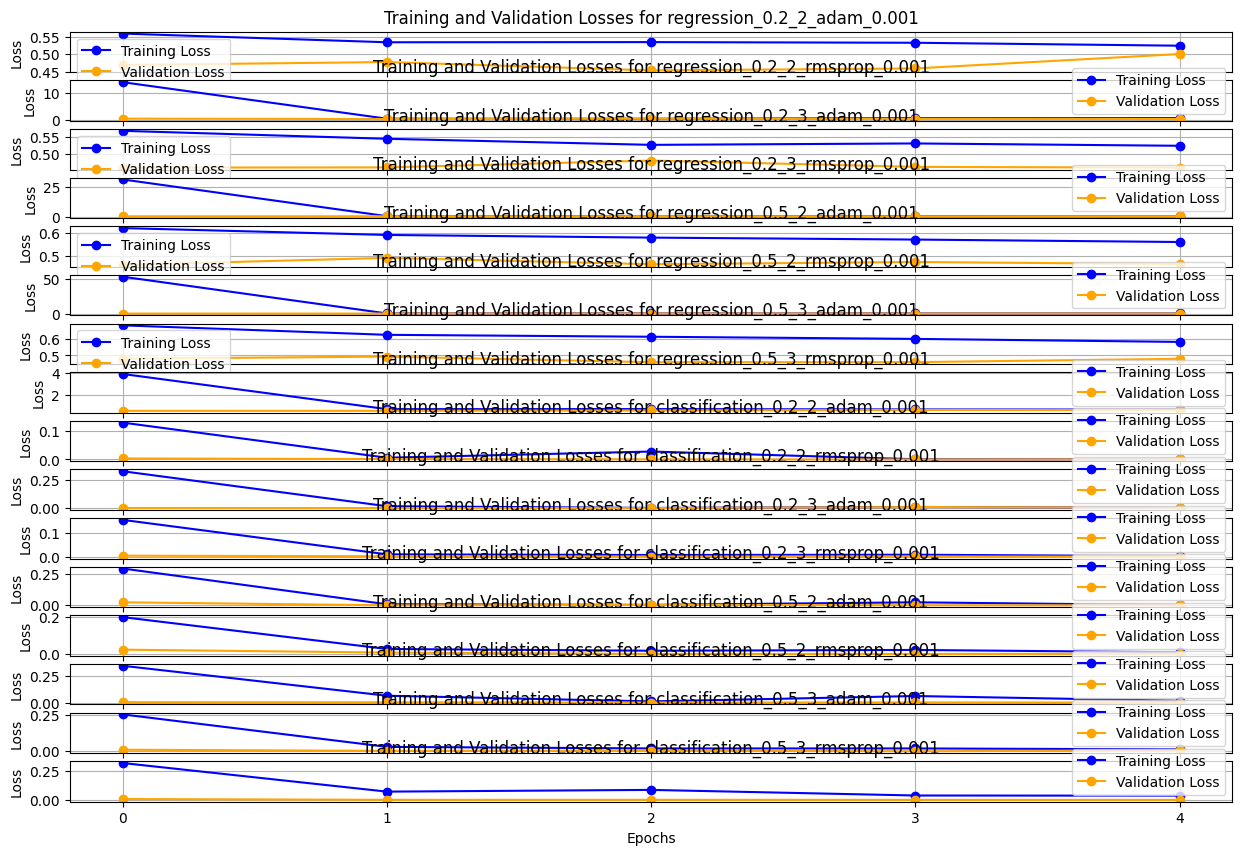

Best Classification Model: classification_0.2_2_adam_0.001
Best Classification Accuracy: 1.0
Best Regression Model: regression_0.2_3_adam_0.001
Best Regression MAE: 0.47476628033320106
Best Regression MSE: 0.4602339804404234


In [ ]:
import os
import itertools
import matplotlib.pyplot as plt
from models.cnn.cnn import CNN, train_model,predict

# Set the working directory
os.chdir('C:/Users/Pavan/Desktop/smai-m24-assignments-codepk37/smai-m24-assignments-codepk37')

# Define hyperparameters
dropout_rates = [0.2, 0.5]
num_conv_layers = [2, 3]
optimizers = ['adam', 'rmsprop']
learning_rates = [0.001]#, 0.01]
tasks = ['regression', 'classification']

def calculate_accuracy(predictions, actuals):
    correct = sum(int(np.round(pred)) == actual for pred, actual in zip(predictions, actuals))
    return correct / len(actuals)

def calculate_mae(predictions, actuals):
    total_absolute_error = sum(abs(pred - actual) for pred, actual in zip(predictions, actuals))
    return total_absolute_error / len(actuals)

def calculate_mse(predictions, actuals):
    total_squared_error = sum((pred - actual) ** 2 for pred, actual in zip(predictions, actuals))
    return total_squared_error / len(actuals)


# Prepare to collect loss and evaluation data
loss_data = {}
evaluation_metrics = {}

# Iterate over each combination of hyperparameters
for task in tasks:
    for dropout_rate in dropout_rates:
        for num_layers in num_conv_layers:
            for optimizer in optimizers:
                for learning_rate in learning_rates:
                    # Initialize the model
                    model = CNN(task=task, num_classes=10, num_conv_layers=num_layers, dropout_rate=dropout_rate)
                    
                    # Train the model
                    train_losses, val_losses = train_model(model, train_loader, val_loader=val_loader, 
                                                           num_epochs=5, optimizer=optimizer, 
                                                           learning_rate=learning_rate)
                    
                    # Store the losses with a unique key for each combination
                    key = f"{task}_{dropout_rate}_{num_layers}_{optimizer}_{learning_rate}"
                    loss_data[key] = (train_losses, val_losses)

                    # Get predictions and ground truth values
                    predictions= predict(model, val_loader)
                    true_labels = []
                    for _, labels in val_loader:
                        true_labels.extend(labels.cpu().numpy().astype(np.int64))
                    

                    # Evaluate based on task type
                    if task == 'classification':
                        # Calculate accuracy
                        accuracy = calculate_accuracy(predictions, true_labels)
                        evaluation_metrics[key] = {'accuracy': accuracy}
                    
                    elif task == 'regression':
                        # Calculate MAE and MSE for regression task
                        mae = calculate_mae(predictions, true_labels)
                        mse = calculate_mse(predictions, true_labels)
                        evaluation_metrics[key] = {'MAE': mae, 'MSE': mse}


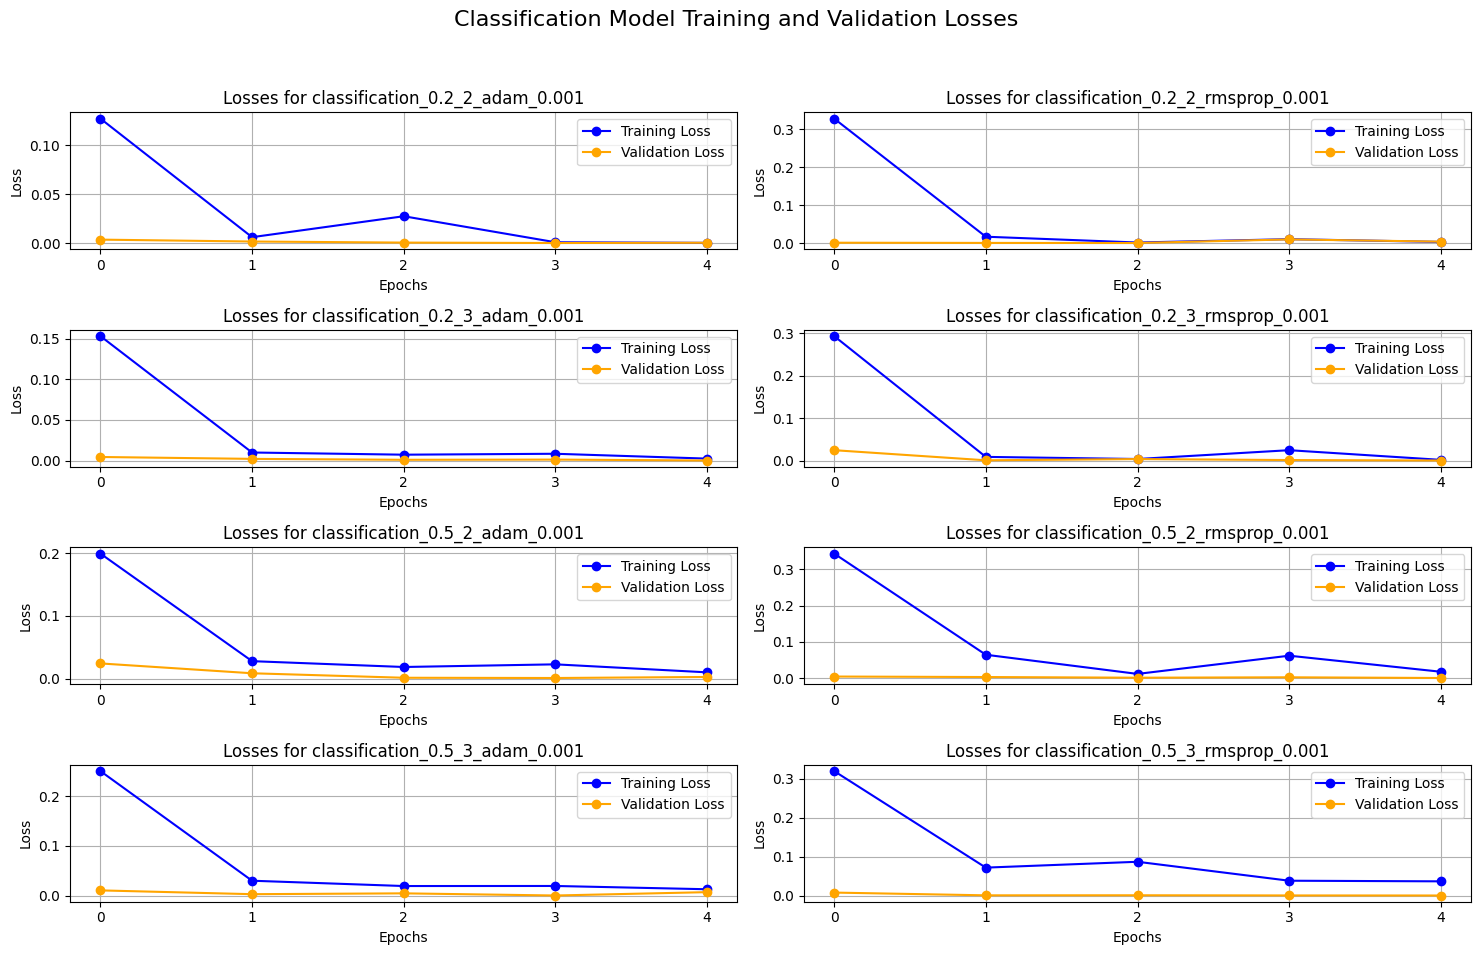

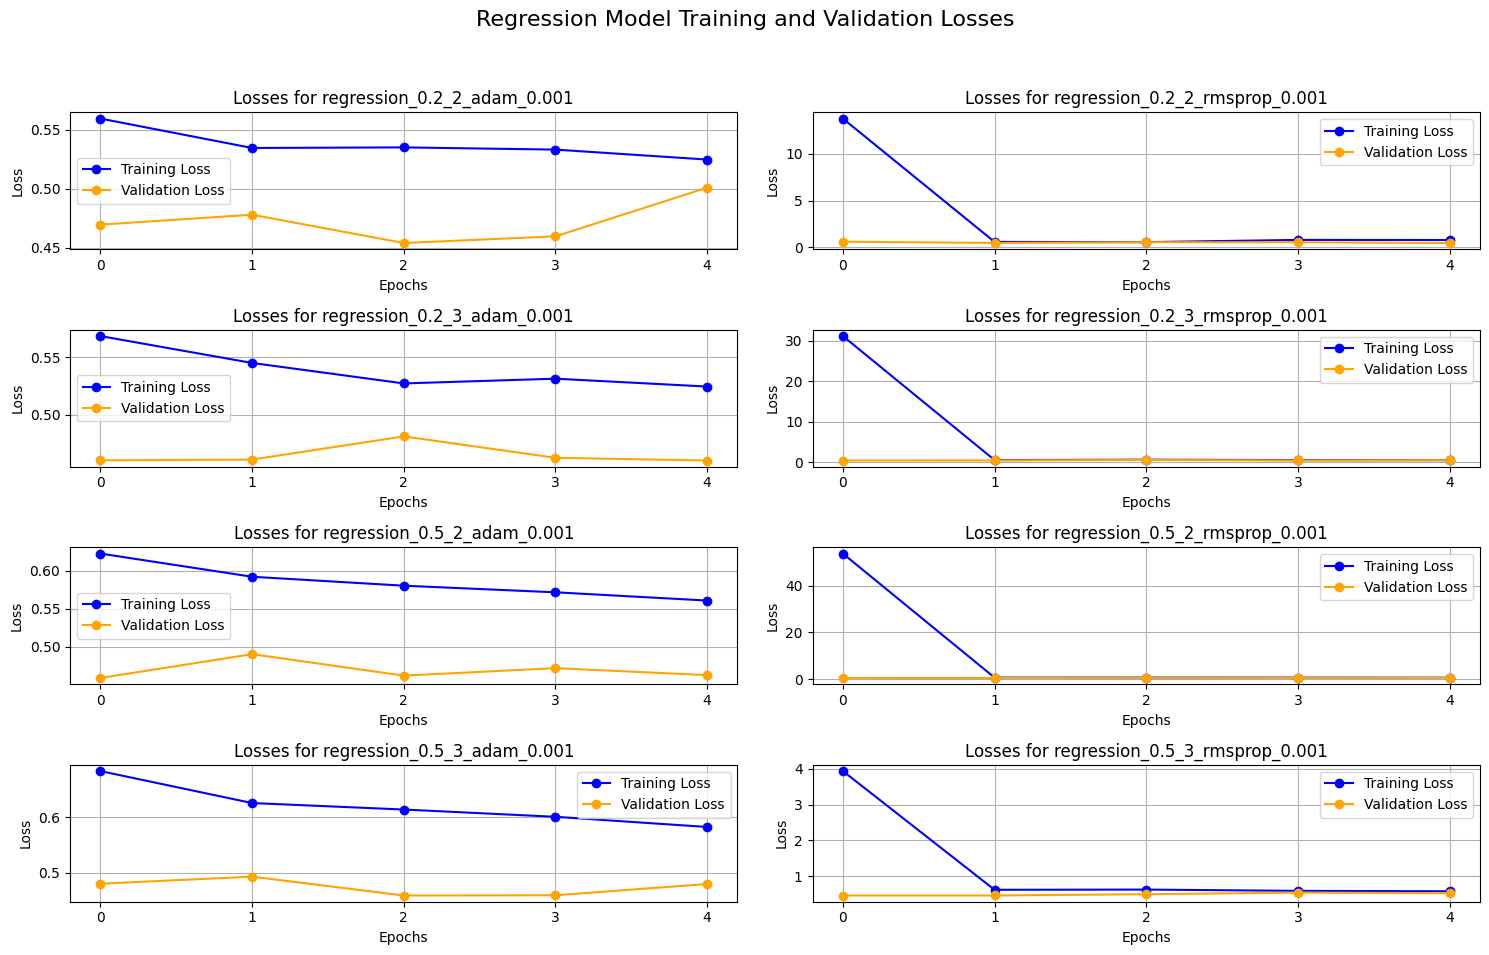

Best Classification Model: classification_0.2_2_adam_0.001
Best Classification Accuracy: 1.0
Best Regression Model: regression_0.2_3_adam_0.001
Best Regression MAE: 0.47476628033320106
Best Regression MSE: 0.4602339804404234


In [19]:
import matplotlib.pyplot as plt

# Define function to plot training and validation losses for a given set of configurations
def plot_losses_by_task(loss_data, task_name):
    # Filter keys for the specific task
    task_keys = [key for key in loss_data.keys() if task_name in key]
    
    # Create a new figure for the task
    plt.figure(figsize=(15, 10))
    num_plots = len(task_keys)
    rows = (num_plots + 1) // 2  # Arrange plots in rows and columns
    
    for i, key in enumerate(task_keys):
        train_losses, val_losses = loss_data[key]
        
        # Plot each configuration in a separate subplot
        plt.subplot(rows, 2, i + 1)  # (rows, cols, index)
        plt.plot(train_losses, label='Training Loss', color='blue', marker='o')
        plt.plot(val_losses, label='Validation Loss', color='orange', marker='o')
        plt.title(f'Losses for {key}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.xticks(range(len(train_losses)))
        plt.legend()
        plt.grid(True)
    
    plt.suptitle(f'{task_name.capitalize()} Model Training and Validation Losses', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot losses separately for classification and regression models
plot_losses_by_task(loss_data, 'classification')
plot_losses_by_task(loss_data, 'regression')

# Determine the best model for each task based on accuracy and MAE
best_classification_model = max(
    {k: v for k, v in evaluation_metrics.items() if 'classification' in k},
    key=lambda x: evaluation_metrics[x]['accuracy']
)
best_regression_model = min(
    {k: v for k, v in evaluation_metrics.items() if 'regression' in k},
    key=lambda x: evaluation_metrics[x]['MAE']
)

# Print the best models and their performance metrics
print("Best Classification Model:", best_classification_model)
print("Best Classification Accuracy:", evaluation_metrics[best_classification_model]['accuracy'])

print("Best Regression Model:", best_regression_model)
print("Best Regression MAE:", evaluation_metrics[best_regression_model]['MAE'])
print("Best Regression MSE:", evaluation_metrics[best_regression_model]['MSE'])


### 3.

In [24]:
model = CNN(task='classification', num_classes=10, num_conv_layers=2, dropout_rate=0.2)

# Train the model
train_model(model, train_loader, val_loader=val_loader, 
                                        num_epochs=5, optimizer='adam', 
                                        learning_rate=0.001)
# Get predictions and ground truth values
predictions= predict(model, val_loader)
true_labels = []
for _, labels in val_loader:
    true_labels.extend(labels.cpu().numpy().astype(np.int64))
accuracy = calculate_accuracy(predictions, true_labels)
print("accuracy in classification val ",accuracy)

predictions= predict(model, test_loader)
true_labels = []
for _, labels in test_loader:
    true_labels.extend(labels.cpu().numpy().astype(np.int64))


accuracy = calculate_accuracy(predictions, true_labels)
print("accuracy in classification test ",accuracy)
##################

model = CNN(task='regression', num_classes=10, num_conv_layers=3, dropout_rate=0.2)

# Train the model
train_model(model, train_loader, val_loader=val_loader, 
                                        num_epochs=5, optimizer='adam', 
                                        learning_rate=0.001)
# Get predictions and ground truth values
predictions= predict(model, val_loader)
true_labels = []
for _, labels in val_loader:
    true_labels.extend(labels.cpu().numpy().astype(np.int64))
accuracy = calculate_accuracy(predictions, true_labels)
print("accuracy in regression val",accuracy)


predictions= predict(model, test_loader)
true_labels = []
for _, labels in test_loader:
    true_labels.extend(labels.cpu().numpy().astype(np.int64))
accuracy = calculate_accuracy(predictions, true_labels)
print("accuracy in regression test",accuracy)


Check hthiss   classification
Epoch [1/5], Training Loss: 0.1193
Epoch [1/5], Validation Loss: 0.0048
Epoch [2/5], Training Loss: 0.0144
Epoch [2/5], Validation Loss: 0.0028
Epoch [3/5], Training Loss: 0.0129
Epoch [3/5], Validation Loss: 0.0039
Epoch [4/5], Training Loss: 0.0010
Epoch [4/5], Validation Loss: 0.0001
Epoch [5/5], Training Loss: 0.0009
Epoch [5/5], Validation Loss: 0.0015
accuracy in classification val  0.9993333333333333
accuracy in classification test  1.0
Check hthiss   regression
Epoch [1/5], Training Loss: 0.5788
Epoch [1/5], Validation Loss: 0.4749
Epoch [2/5], Training Loss: 0.5434
Epoch [2/5], Validation Loss: 0.5202
Epoch [3/5], Training Loss: 0.5364
Epoch [3/5], Validation Loss: 0.5018
Epoch [4/5], Training Loss: 0.5351
Epoch [4/5], Validation Loss: 0.4667
Epoch [5/5], Training Loss: 0.5321
Epoch [5/5], Validation Loss: 0.4645
accuracy in regression val 0.5333333333333333
accuracy in regression test 0.43478260869565216


## 2.4 Feature map Visualization


In [12]:
#another ipynb file made